
**Практическая работа #1. Методы машинного обучения в задачах кибербезопасности**

Работу выполнил студент:

группы: ББМО-01-23

Белов Владимир Станиславович

**Задание 1. Разбиение выборки на обучающую и тестовую**

Поключим библиотеки, с которыми будем работать

In [38]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

Импортируем набор данных и выведем содержимое в нём

In [39]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
spam = pd.read_csv(url)
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


Проведём предобработку данных

In [40]:
column_names = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
    "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
    "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
    "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
    "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money",
    "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650",
    "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857",
    "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
    "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
    "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference",
    "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$",
    "char_freq_#", "capital_run_length_average", "capital_run_length_longest",
    "capital_run_length_total", "is_spam"
]
data = pd.read_csv(url, header=None, names=column_names)

Теперь мы можем провести анализ сбалансированности классов

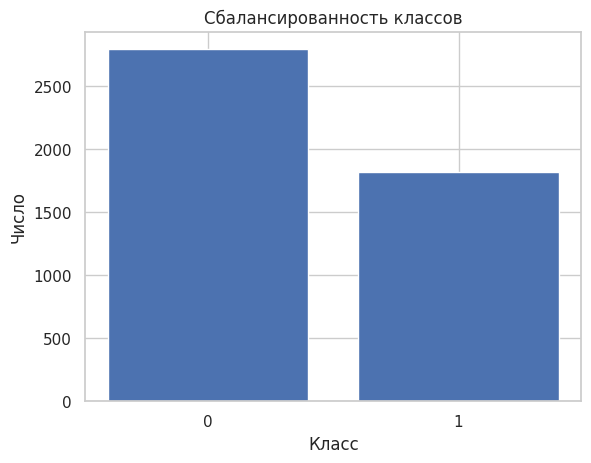

In [41]:
class_counts = data['is_spam'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Класс')
plt.xticks(df['is_spam'].unique())
plt.ylabel('Число')
plt.title('Сбалансированность классов')
plt.show()

Проведём разделение на выборки с использованием train_test_split из sklearn.model_selection в соотношении 80/20 и 70/30

In [42]:
X = df.drop(columns=['is_spam'])
y = df['is_spam']

for train_index, test_index in skl.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42).split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
print("Первая обучающая выборка:", X_train.shape[0])
print("Первая тестовая выборка:", X_test.shape[0])
for train_index, test_index in skl.model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42).split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
print("Вторая обучающая выборка:", X_train.shape[0])
print("Вторая тестовая выборка:", X_test.shape[0])

Первая обучающая выборка: 3680
Первая тестовая выборка: 921
Вторая обучающая выборка: 3220
Вторая тестовая выборка: 1381


**Задание 2. Нормализация данных**

Загрузим набор и выведем информацию

In [46]:
nsfg = pd.read_hdf('/content/sample_data/nsfg.hdf5')
print(nsfg.shape)
print(nsfg.columns)
ounces = nsfg['birthwgt_oz1']
# Печать первых 5 элементов унций
print(ounces.head(5))

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')
0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64


Произведем чистку, уберем неопознанные переменные из 8 столбца

In [49]:
nsfg['nbrnaliv'].value_counts()
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)
print(nsfg['nbrnaliv'].value_counts())

nbrnaliv
1.0    6379
2.0     100
3.0       5
Name: count, dtype: int64


Вычислим разницу

In [50]:
nsfg['agecon'].describe()
nsfg['agepreg'].describe()

# Выделим столбцы и разделим на 100.
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

preg_length = agepreg - agecon
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


Виазуализируем данные и проведем фильтрацию

Text(0, 0.5, 'Число беременностей')

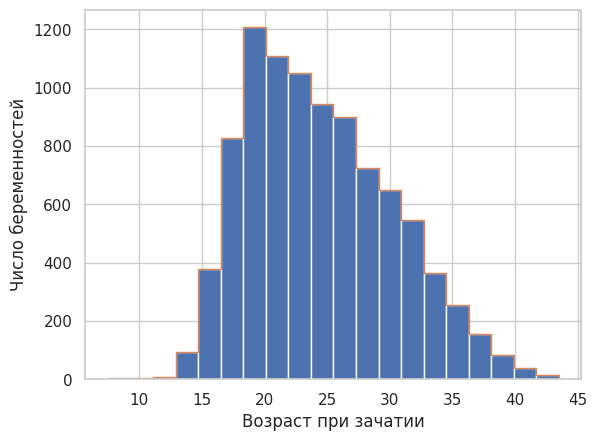

In [55]:
plt.hist(agecon, bins=20)
plt.xlabel("Возраст при зачатии")
plt.ylabel('Число беременностей')
plt.hist(agecon, bins=20, histtype='step')
plt.xlabel("Возраст при зачатии")
plt.ylabel('Число беременностей')

Высчитаем веса

In [56]:
def resample_rows_weighted(df, column='wgt2013_2015'):
    """Resamples a DataFrame using probabilities proportional to given column.
    Args:
        df: DataFrame
        column: string column name to use as weights
    returns:
        DataFrame
    """
    weights = df[column].copy()
    weights /= sum(weights)
    indices = np.random.choice(df.index, len(df), replace=True, p=weights)
    sample = df.loc[indices]
    return sample

nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

birth_weight = pounds + ounces/16
full_term = nsfg['prglngth'] >= 37
full_term_weight = birth_weight[full_term]
print(full_term_weight.mean())

7.419248286435787


Применим фильтр

In [57]:

full_term = nsfg['prglngth'] >= 37
single = nsfg['nbrnaliv'] == 1

single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.430551771117166
Multiple full-term mean: 5.823717948717949


**Задание 3. Линейная алгебра**

В данной задании нам необходимо решить 10 задач из файла 01-linear-algebra.ipynb

1) Докажите, что транспонирование транспонированной матрицы - это сама матрица

In [76]:
matrix1 = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
matrix2 = matrix1.T.T
print("Матрица:","\n",matrix1)
print("Дважды транспонированная матрица:","\n",matrix2)

Матрица: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Дважды транспонированная матрица: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


2) Для двух матриц, покажите, что сумма и транспозиция коммутируют

In [77]:
# Вычисление левой и правой частей выражения
left_side = matrix1.T + matrix2.T
right_side = (matrix1 + matrix2).T

print("Левая часть выражения:","\n",left_side)
print("Правая часть выражения:","\n",right_side)

Левая часть выражения: 
 [[ 2  8 14]
 [ 4 10 16]
 [ 6 12 18]]
Правая часть выражения: 
 [[ 2  8 14]
 [ 4 10 16]
 [ 6 12 18]]


3) Для любой квадратичной матрицы, сумма матриц $\mathbf{A} + \mathbf{A}^\top$ всегда ли симметрична?

In [74]:
sum_matrix = matrix1 + matrix1.T
is_symmetric = np.allclose(sum_matrix, sum_matrix.T)
print("Сумма матрицы и её транспозиции:", "\n", sum_matrix)
print("Матрица симметрична?", is_symmetric)

Сумма матрицы и её транспозиции: 
 [[ 2  6 10]
 [ 6 10 14]
 [10 14 18]]

Матрица симметрична? True


4) Мы определяли тензор `X` размерности (2, 3, 4). Что возвращает функция `len(X)`?

In [78]:
X = np.zeros((2, 3, 4))
length = len(X)

print("Длина тензора X:", length)

Длина тензора X: 2


 5) Запустите следующий фрагмент кода `A / A.sum(axis=1)` и проверьте полученный результат.

In [83]:
result = matrix1 / matrix1.sum(axis=1)
print("Результат:", "\n", result)

Результат: 
 [[0.16666667 0.13333333 0.125     ]
 [0.66666667 0.33333333 0.25      ]
 [1.16666667 0.53333333 0.375     ]]


6) Рассмотрим тензор размерности (2, 3, 4). Какие размерности можно получить при суммирования элементов тензора по осям 0, 1 и 2?

In [87]:
sum_axis0 = np.sum(X, axis=0)
sum_axis1 = np.sum(X, axis=1)
sum_axis2 = np.sum(X, axis=2)
print("Сумма оси 0:", sum_axis0.shape)
print("Сумма оси 1:", sum_axis1.shape)
print("Сумма оси 2:", sum_axis2.shape)

Сумма оси 0: (3, 4)
Сумма оси 1: (2, 4)
Сумма оси 2: (2, 3)


7) Передайте тензор с 3 или более осями в функцию `linalg.norm` и наблюдайте за его выводом. Что эта функция вычисляет для тензоров произвольной формы?

In [91]:
norma = np.linalg.norm(X)
print("Выход:", norma)

Выход: 0.0


Эта функция способна возвращать одну из восьми различных матричных норм или одну из бесконечного числа векторных норм

8) Определите 3 матрицы $\mathbf{A} \in \mathbb{R}^{2^{10} \times 2^{16}}$, $\mathbf{B} \in \mathbb{R}^{2^{16} \times 2^{5}}$ и $\mathbf{C} \in \mathbb{R}^{2^{5} \times 2^{14}}$, содержащие случайные переменные, распределенные по нормальному закону распределения. Вычислите произведение матриц: $\mathbf{A} \mathbf{B} \mathbf{C}$. Есть ли какая-либо разница в объеме памяти и скорости в зависимости от того, вычилсяете Вы $(\mathbf{A} \mathbf{B}) \mathbf{C}$ или $\mathbf{A} (\mathbf{B} \mathbf{C})$?

In [92]:
A = np.random.randn(2**10, 2**16)
B = np.random.randn(2**16, 2**5)
C = np.random.randn(2**5, 2**14)
result1 = np.dot(np.dot(A, B), C)  # Вычисление (AB)C
result2 = np.dot(A, np.dot(B, C))  # Вычисление A(BC)

# Проверка на равенство результатов
are_equal = np.allclose(result1, result2)

print("Размерность результата (AB)C:", result1.shape)
print("Размерность результата A(BC):", result2.shape)
print("Результаты равны:", are_equal)


Размерность результата (AB)C: (1024, 16384)
Размерность результата A(BC): (1024, 16384)
Результаты равны: True


В ходе работы вычисления $\mathbf{A} (\mathbf{B} \mathbf{C})$ заняло больше времени, чем $(\mathbf{A} \mathbf{B}) \mathbf{C}$.

9) Определите 3 матрицы $\mathbf{A} \in \mathbb{R}^{2^{10} \times 2^{16}}$, $\mathbf{B} \in \mathbb{R}^{2^{16} \times 2^{5}}$ and $\mathbf{C} \in \mathbb{R}^{2^{5} \times 2^{16}}$.

In [94]:
rows_A, cols_A = 2**10, 2**16
rows_B, cols_B = 2**16, 2**5
rows_C, cols_C = 2**5, 2**16

# Создаем матрицы A, B и C с случайными значениями
A = np.random.rand(rows_A, cols_A)
B = np.random.rand(rows_B, cols_B)
C = np.random.rand(rows_C, cols_C)

AB = np.dot(A, B)
AC_T = np.dot(A, C.T)

print("Размерность матрицы AB:", AB.shape)
print("Размерность матрицы AC^T:", AC_T.shape)

Размерность матрицы AB: (1024, 32)
Размерность матрицы AC^T: (1024, 32)


Определите 3 матрицы $\mathbf{A}, \mathbf{B}, \mathbf{C} \in \mathbb{R}^{100 \times 200}$. Сформируйте тензор с 3-мя осями путем объединения матриц $[\mathbf{A}, \mathbf{B}, \mathbf{C}]$. Какова размерность софрмирвоанного тензора? Вырежьте вторую координату третьей оси, чтобы восстановить $\mathbf{B}$. Проверьте, что ваш ответ правильный.

In [101]:
rows, cols = 100, 200

A = np.random.rand(rows, cols)
B = np.random.rand(rows, cols)
C = np.random.rand(rows, cols)
tensor = np.stack([A, B, C], axis=2)

print("Размерность тензора:", tensor.shape)

# Вырезаем вторую координату третьей оси для восстановления матрицы B
B2 = tensor[:, :, 1]
are_equal = np.allclose(B, B2)
print("Матрицы B и B2 равны?", are_equal)


Размерность тензора: (100, 200, 3)
Матрицы B и B2 равны? True


**Задание 4. Работа с данными в фреймворке PyCaret**

Выполните следующие задания:
* Импортируйте набор данных 'diabetes'
* Выполните импорт всех библиотек из модуля classification библиотеки pycaret
* Настройте эксперимент, цель - значения столбца 'Class variable'
* Выполните поиск наилучшей модели
* Определите наиболее значимые признаки  
* Выполните графическое построение наилучшей модели

Установим pycater

In [102]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5

Импортируем необходимые библиотеки и набор данных из PyCaret

In [2]:
from pycaret.datasets import get_data
from pycaret.classification import *

data_diabetes = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Настроим эксперимент, цель - значения столбца 'Class variable'


In [3]:
exp_diabetes = setup(data=data_diabetes, target='Class variable', session_id=123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


Выполним поиск наилучшей модели

In [4]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,1.0290
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0500
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0600
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.4310
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0360
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.2630
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1730
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.2030
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0820
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.6500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Логистическая модель оказалось наилучшей. Определим наиболее значимые признаки

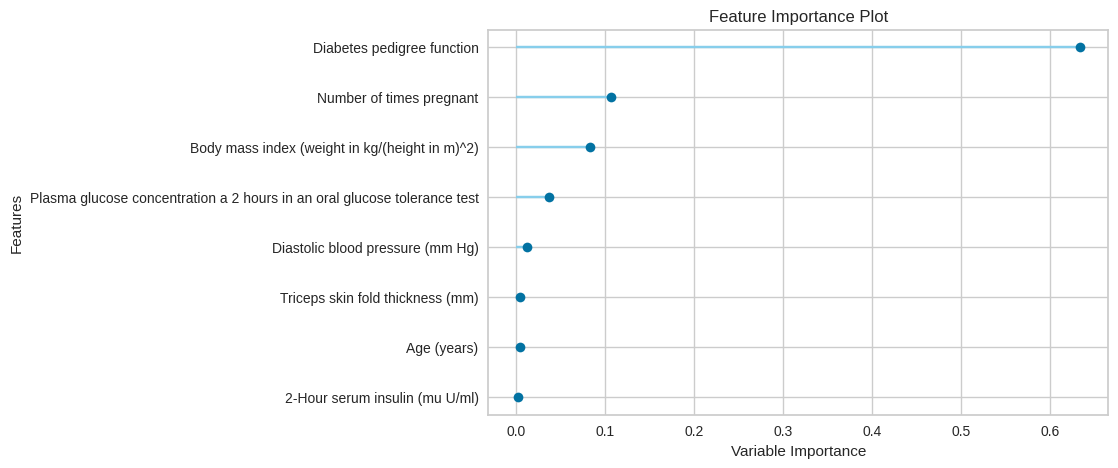

In [5]:
plot_model(best_model, plot='feature')

Выполним графическое построение наилучшей модели

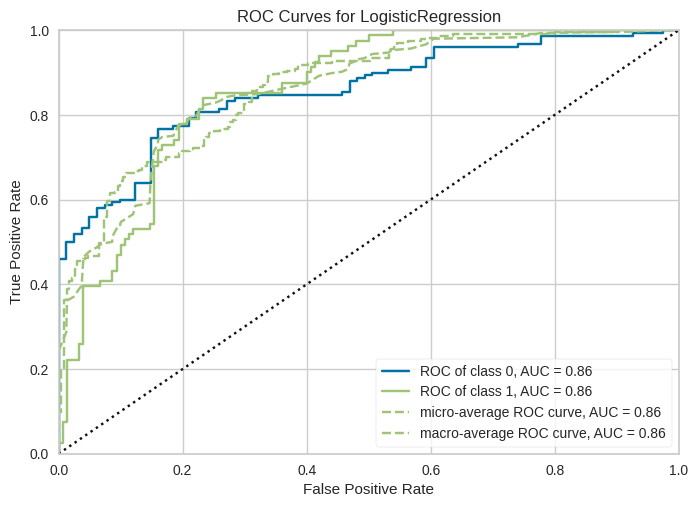

In [6]:
plot_model(best_model)